In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import os 
import matplotlib.dates as mdates

In [11]:
path = "/Users/happy1claire/Desktop/24237376"

files = [file for file in os.listdir(path) if file.startswith("eaglei")]
dfs = []
for file in files:
    df = pd.read_csv(os.path.join(path, file))
    dfs.append(df)

df = pd.concat(dfs, ignore_index=True)
df = df[df["state"] == "Washington"] 
df = df[df["county"] == "King"]

<bound method DataFrame.info of            fips_code county       state  customers_out       run_start_time  \
696            53033   King  Washington          219.0  2019-01-01 00:00:00   
1402           53033   King  Washington          219.0  2019-01-01 00:15:00   
2129           53033   King  Washington          219.0  2019-01-01 00:30:00   
2845           53033   King  Washington          221.0  2019-01-01 00:45:00   
3542           53033   King  Washington          213.0  2019-01-01 01:00:00   
...              ...    ...         ...            ...                  ...   
191127764      53033   King  Washington            1.0  2014-12-30 19:45:00   
191128103      53033   King  Washington            1.0  2014-12-30 20:00:00   
191128445      53033   King  Washington            1.0  2014-12-30 20:15:00   
191128783      53033   King  Washington            1.0  2014-12-30 20:30:00   
191129114      53033   King  Washington            1.0  2014-12-30 20:45:00   

           sum  
69

In [42]:
df["run_start_time"] = pd.to_datetime(df['run_start_time'], format='%Y-%m-%d %H:%M:%S')
df = df[(df['run_start_time'].dt.year >= 2018) & (df['run_start_time'].dt.year <= 2022)]
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 169031 entries, 696 to 148120024
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   fips_code       169031 non-null  int64         
 1   county          169031 non-null  object        
 2   state           169031 non-null  object        
 3   customers_out   168592 non-null  float64       
 4   run_start_time  169031 non-null  datetime64[ns]
 5   sum             0 non-null       float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 9.0+ MB


(array([17471., 17501., 17532., 17563., 17591., 17622., 17652., 17683.,
        17713., 17744., 17775., 17805., 17836., 17866., 17897., 17928.,
        17956., 17987., 18017., 18048., 18078., 18109., 18140., 18170.,
        18201., 18231., 18262., 18293., 18322., 18353., 18383., 18414.,
        18444., 18475., 18506., 18536., 18567., 18597., 18628., 18659.,
        18687., 18718., 18748., 18779., 18809., 18840., 18871., 18901.,
        18932., 18962., 18993., 19024., 19052., 19083., 19113., 19144.,
        19174., 19205., 19236., 19266., 19297., 19327., 19358., 19389.,
        19417., 19448.]),
 [Text(17471.0, 0, 'Nov 2017'),
  Text(17501.0, 0, 'Dec 2017'),
  Text(17532.0, 0, 'Jan 2018'),
  Text(17563.0, 0, 'Feb 2018'),
  Text(17591.0, 0, 'Mar 2018'),
  Text(17622.0, 0, 'Apr 2018'),
  Text(17652.0, 0, 'May 2018'),
  Text(17683.0, 0, 'Jun 2018'),
  Text(17713.0, 0, 'Jul 2018'),
  Text(17744.0, 0, 'Aug 2018'),
  Text(17775.0, 0, 'Sep 2018'),
  Text(17805.0, 0, 'Oct 2018'),
  Text(17836.0

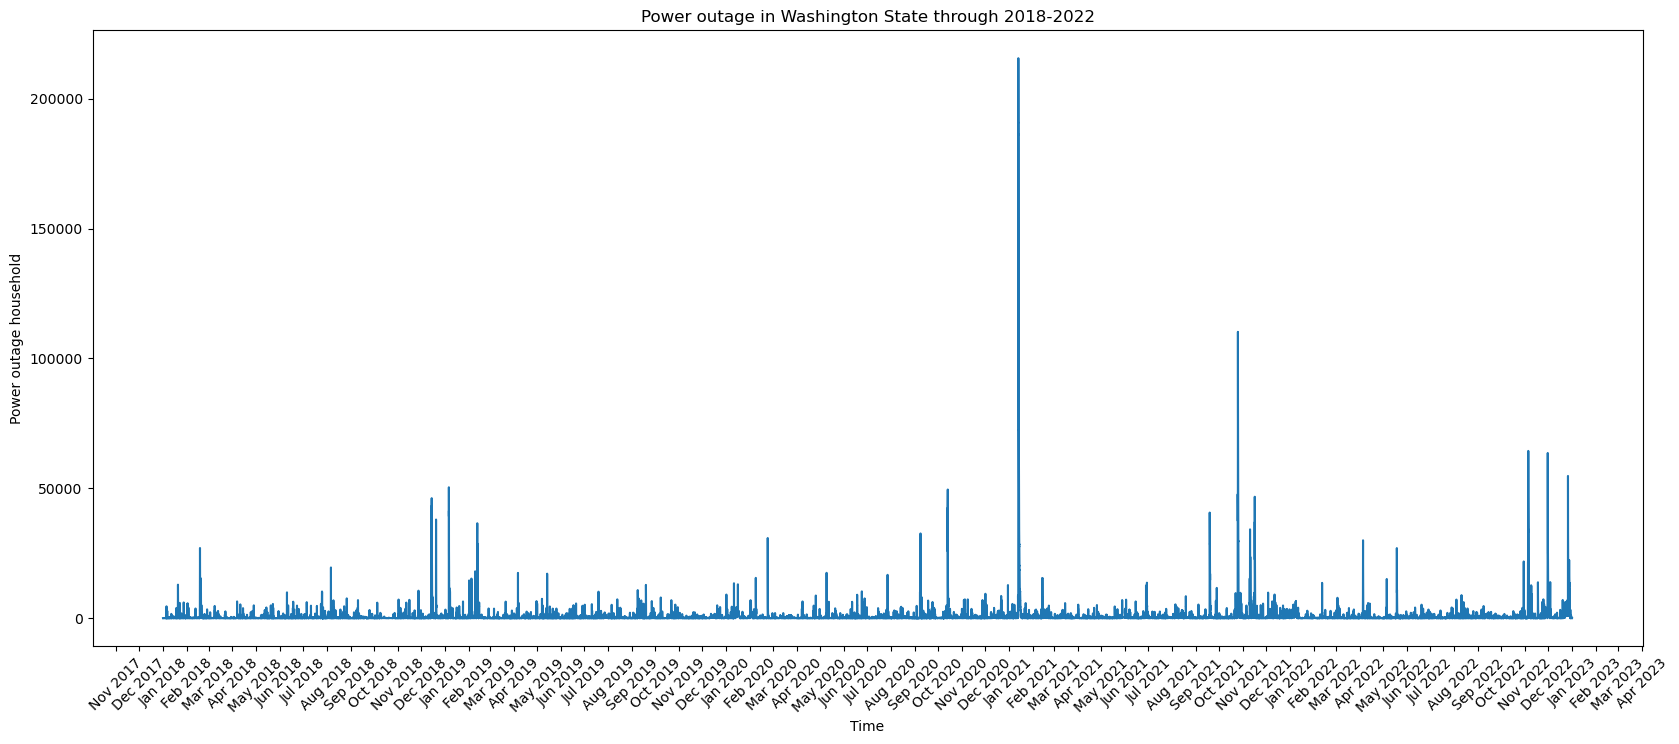

In [52]:
fig, ax = plt.subplots(figsize = (20,8)) 
sns.lineplot(data=df, x = "run_start_time", y = "customers_out", ax = ax)
ax.xaxis.set_major_locator(mdates.MonthLocator()) 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.title("Power outage in Washington State through 2018-2022")
plt.ylabel("Power outage household")
plt.xlabel("Time")
plt.xticks(rotation=45)

In [54]:
df.to_csv("result.csv")